# Ejercicio de Regresión Logistica

In [1]:
# # Importa las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
datos = pd.read_csv("./framingham.csv")
datos

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


## Selección de Variables
A continuación, escojo las variables que considero son importantes para predecir el riesgo
de enfermedad coronaria en 10 años.

In [3]:
variablesInteres = ['age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
                     'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

In [4]:
 X = datos[variablesInteres]
 y = datos["TenYearCHD"]   

## Creación del Modelo

In [5]:
# Divido los datos de entrenamiento y los datos de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
#Dado que X es decir las variables de interes poseen filas con valores NaN realizamos lo siguiente para eliminar esas filas.
# Encuentra las filas con valores NaN en X_train
filas_con_nan = np.isnan(X_train).any(axis=1)

# Elimina las filas con valores NaN de X_train y y_train
X_train = X_train[~filas_con_nan]
y_train = y_train[~filas_con_nan]

# Encuentra las filas con valores NaN en X_test
filas_con_nan_test = np.isnan(X_test).any(axis=1)

# Elimina las filas con valores NaN de X_test y y_test
X_test = X_test[~filas_con_nan_test]
y_test = y_test[~filas_con_nan_test]

In [7]:
#Dado que X es decir las variables de interes poseen filas con valores NaN realizamos lo siguiente para eliminar esas filas.
# Encuentra las filas con valores NaN en X_train
filas_con_nan = np.isnan(X_train).any(axis=1)

# Elimina las filas con valores NaN de X_train y y_train
X_train = X_train[~filas_con_nan]
y_train = y_train[~filas_con_nan]

# Encuentra las filas con valores NaN en X_test
filas_con_nan_test = np.isnan(X_test).any(axis=1)

# Elimina las filas con valores NaN de X_test y y_test
X_test = X_test[~filas_con_nan_test]
y_test = y_test[~filas_con_nan_test]

In [8]:
#Escalo las caracteristicas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Creamos el modelo de regresión logistica
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [10]:
# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [11]:
# Evalúa el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [12]:
# Imprime los resultados
print(f"Precisión: {accuracy}")
print("Matriz de confusión:\n", conf_matrix)
print("Informe de clasificación:\n", class_report)

Precisión: 0.8578947368421053
Matriz de confusión:
 [[646   3]
 [105   6]]
Informe de clasificación:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92       649
           1       0.67      0.05      0.10       111

    accuracy                           0.86       760
   macro avg       0.76      0.52      0.51       760
weighted avg       0.83      0.86      0.80       760



## Desarrollo
Crearemos graficos con las relaciones de las variables de interes con el objetivo de conocer
cuales son las probabilidades de que una persona con ciertas caracteristicas pueda obtener una emfermedad
coronaria en 10 años.

1. Exploraremos las probabilidades de una persona que tiene el hábito de fumar pueda desarrollar un problema coronario en un período de 10 años. Para ello, estableceremos una relación entre las variables 'currentSmoker' y 'cigsPerDay'.

### CigsPerDay y TenYearCHD

In [13]:
# Obténemos las probabilidades estimadas para los datos de prueba
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

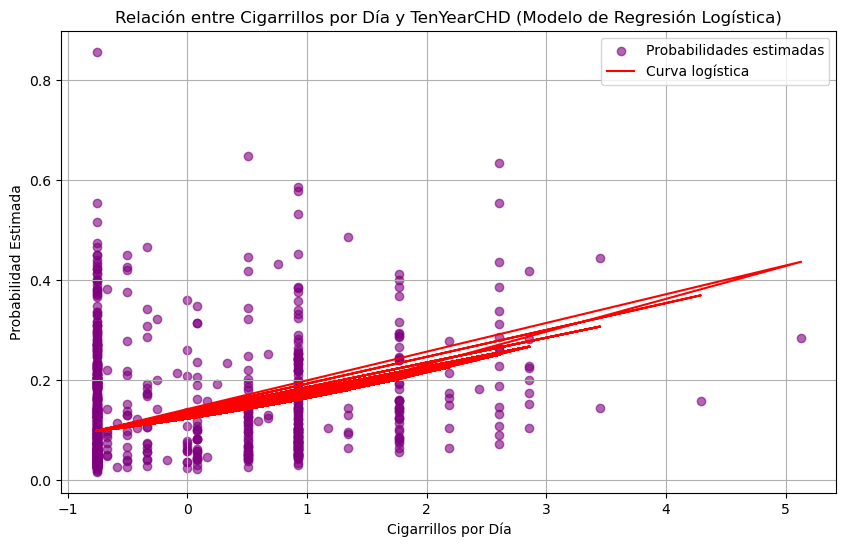

In [14]:
##CigsPerDay
# Obtén las probabilidades estimadas para los datos de prueba
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

# Creamos el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, variablesInteres.index('cigsPerDay')], y_probs, color='purple', alpha=0.6, label='Probabilidades estimadas')

# Agregamos la curva logística
cigs_per_day_values = X_test[:, variablesInteres.index('cigsPerDay')]
logistic_curve = 1 / (1 + np.exp(-(model.intercept_ + model.coef_[:, variablesInteres.index('cigsPerDay')] * cigs_per_day_values)))
plt.plot(cigs_per_day_values, logistic_curve, color='red', label='Curva logística')

plt.xlabel('Cigarrillos por Día')
plt.ylabel('Probabilidad Estimada')
plt.legend()
plt.title('Relación entre Cigarrillos por Día y TenYearCHD (Modelo de Regresión Logística)')
plt.grid(True)
plt.show()

# Conclusiones
Al analizar el gráfico y los resultados obtenidos a partir del código que relaciona la cantidad de cigarrillos por día ('cigsPerDay') con las probabilidades estimadas de desarrollar problemas coronarios en los próximos 10 años ('TenYearCHD'), es posible llegar a las siguientes conclusiones:
1. **Mayor Consumo de Cigarrillos Aumenta las Probabilidades:** A medida que la cantidad de cigarrillos fumados por día ('cigsPerDay') aumenta en el eje X, las probabilidades estimadas en el eje Y tienden a aumentar. Esto sugiere que hay una relación positiva entre la cantidad de cigarrillos fumados por día y el riesgo estimado de problemas coronarios. Cuanto más fuma una persona al día, mayor es su probabilidad estimada de desarrollar problemas coronarios.

2. **Conclusión curva logistica:** La curva logística es gradual al principio y luego se vuelve más pronunciada, lo que refleja un aumento más rápido en las probabilidades a medida que aumenta la cantidad de cigarrillos por día. Por lo tanto, está muestra las proabilidades a medida que la variable ('cigsPerDay') aumenta. 

3. **Importancia del Hábito de Fumar:** El gráfico enfatiza la importancia del hábito de fumar en la predicción de problemas coronarios. Cuanto más fuma una persona, mayor es su riesgo estimado. Esta información puede servir como una advertencia visual sobre los riesgos asociados con el tabaquismo.

### CurrentSmoker y TenYearCHD

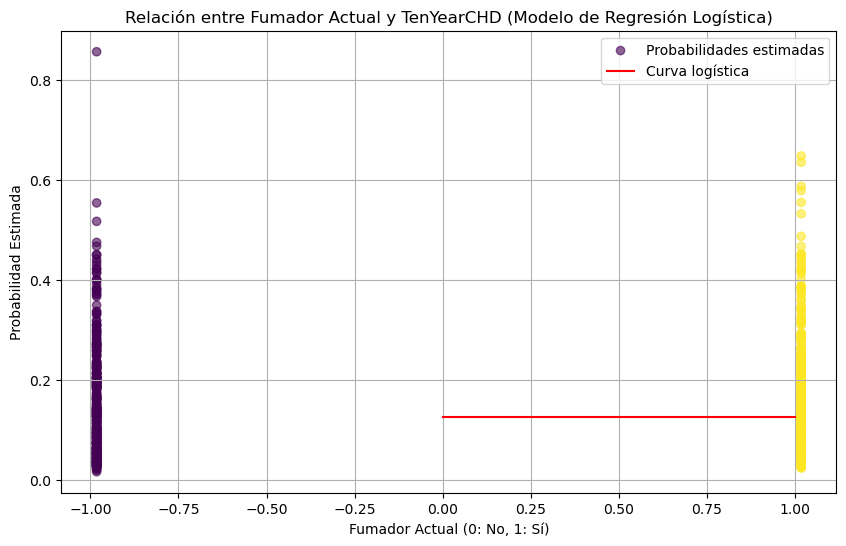

In [15]:
##CurrentSmoker
# Creamos el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, variablesInteres.index('currentSmoker')], y_probs, c=X_test[:, variablesInteres.index('currentSmoker')],
            cmap='viridis', alpha=0.6, label='Probabilidades estimadas')

# Agregamos la curva logística
logistic_curve = 1 / (1 + np.exp(-(model.intercept_ + model.coef_[:, variablesInteres.index('currentSmoker')])))
plt.plot([0, 1], [logistic_curve[0], logistic_curve[0]], color='red', label='Curva logística')

plt.xlabel('Fumador Actual (0: No, 1: Sí)')
plt.ylabel('Probabilidad Estimada')
plt.legend()
plt.title('Relación entre Fumador Actual y TenYearCHD (Modelo de Regresión Logística)')
plt.grid(True)
plt.show()

# Conclusiones
1. **Impacto del Hábito de Fumar:** El gráfico muestra claramente cómo el hábito de fumar (representado como "Fumador Actual") afecta las probabilidades estimadas de problemas coronarios. En el eje X, 0 representa "No Fumador" y 1 representa "Fumador Actual". A medida que pasamos de "No Fumador" a "Fumador Actual" en el eje X, las probabilidades estimadas en el eje Y aumentan significativamente.

2. **Conclusión curva logistica:** La curva logística roja representa la relación entre ser fumador actual y las probabilidades estimadas. La curva muestra una transición de probabilidades bajas (para "No Fumador") a probabilidades altas (para "Fumador Actual") Ya que se comienza a marca a partir de 0.00. Esto indica que el ser un fumador actual es un factor importante que aumenta las probabilidades de desarrollar problemas coronarios según el modelo.

3. **Importancia del Hábito de Fumar:** Este análisis puede ser útil para las personas que desean tomar decisiones informadas sobre su hábito de fumar. Muestra claramente cómo dejar de fumar (cambiando de 1 a 0 en el eje X) puede reducir significativamente las probabilidades estimadas de problemas coronarios.

#### Nota:
Así como se utlizo las variables relacionadas con el habito de fumar, el modelo está creado para agregar otras variables de interes y conocer las probabilidades que una persona puede tener para conocer si en 10 puede llegar a sufrir de problemas coronarios.